In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_cities(N):
    cities = []
    for i in range(N):
        cities.append(np.random.rand(2) * 10)
    return np.array(cities)

In [3]:
cities = create_cities(4)

In [4]:
import itertools

def distance_between_points(point_A, point_B):
    return np.sqrt((point_A[0] - point_B[0])**2 + (point_A[1] - point_B[1])**2)

def get_distance_matrix(cities):
    number_of_cities = len(cities)
    matrix = np.zeros((number_of_cities, number_of_cities))
    for i in range(number_of_cities):
        for j in range(i, number_of_cities):
            matrix[i][j] = distance_between_points(cities[i], cities[j])
            matrix[j][i] = matrix[i][j]
    return matrix

In [5]:
distance_matrix = get_distance_matrix(cities)
print(distance_matrix)

[[0.         3.45223938 8.04590515 3.263227  ]
 [3.45223938 0.         4.84822634 4.07986045]
 [8.04590515 4.84822634 0.         8.77060939]
 [3.263227   4.07986045 8.77060939 0.        ]]


In [6]:
def calculate_cost(cost_matrix, solution):
    cost = 0
    return sum([cost_matrix[a][b] for a, b  in zip(solution[:-1], solution[1:])])


def solve_tsp_brute_force(cities, starting_city, verbose=True):
    number_of_cities = len(cities)
    initial_order = range(number_of_cities)
    cost_matrix = get_distance_matrix(cities)

    all_permutations = [list(x) for x in itertools.permutations(initial_order)]
    best_permutation = all_permutations[0]
    best_cost = calculate_cost(cost_matrix, best_permutation)*1000

    for permutation in all_permutations:
        if permutation[0] != starting_city:
            continue
        current_cost = calculate_cost(cost_matrix, permutation)
        if current_cost < best_cost:
            best_permutation = permutation
            best_cost = current_cost
    if verbose:
        print("Best route:", best_permutation)
        print("Cost:", best_cost)
    return best_permutation

In [7]:
solution = solve_tsp_brute_force(cities, 0)

Best route: [0, 3, 1, 2]
Cost: 12.19131378949465


In [8]:
import matplotlib.pyplot as plt

def plot_solution(cities, solution):
    x = [cities[i][0] for i in solution]
    y = [cities[i][1] for i in solution]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    for i, (city_x, city_y) in enumerate(cities):
        plt.text(city_x, city_y, str(i), fontsize=12, ha='center', va='bottom')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimal Solution Path')
    plt.grid(True)
    plt.show()


Best route: [0, 4, 5, 3, 2, 1]
Cost: 14.414401697767515


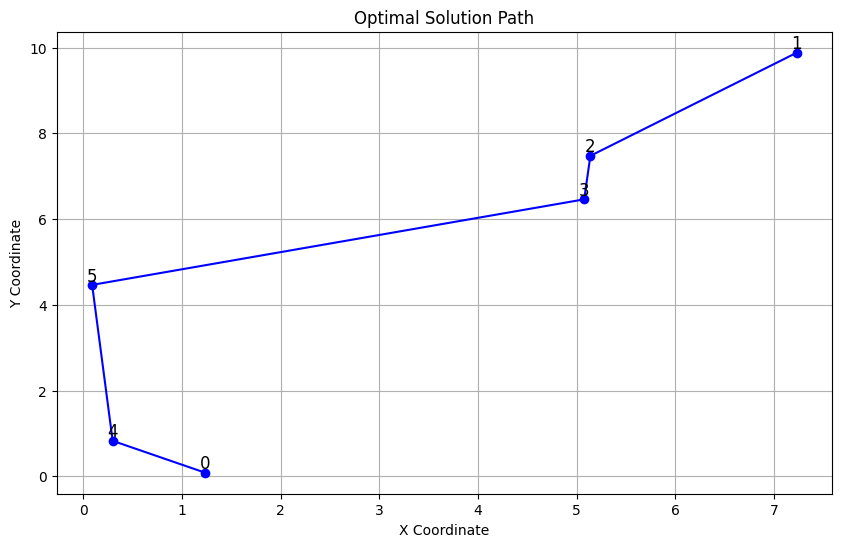

In [9]:
cities_6 = create_cities(6)
solution = solve_tsp_brute_force(cities_6, 0)
plot_solution(cities_6, solution)

Best route: [0, 4, 7, 8, 9, 2, 3, 1, 5, 6]
Cost: 22.935869263628796


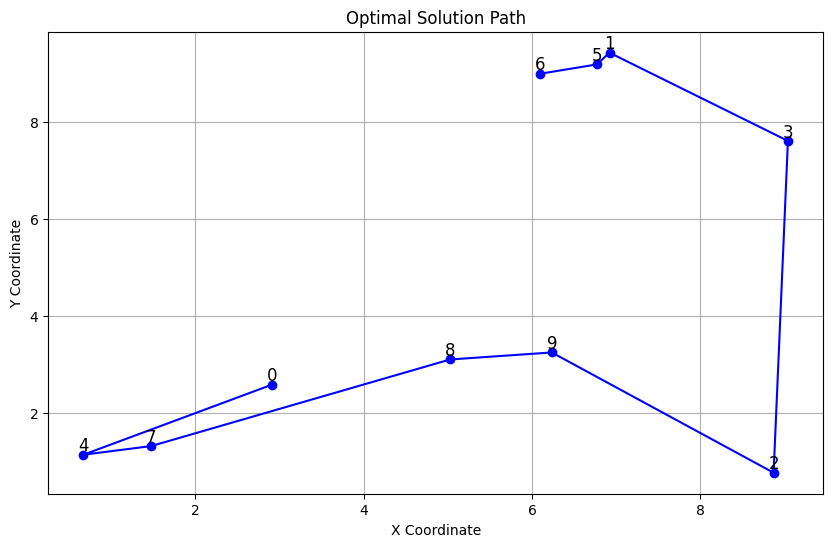

In [10]:
cities_10 = create_cities(10)
solution = solve_tsp_brute_force(cities_10, 0)
plot_solution(cities_10, solution)

In [11]:
for i in range(4, 10):
    print(i, "cities")
    %time solution = solve_tsp_brute_force(create_cities(i), 0, verbose=False)

4 cities
CPU times: user 256 µs, sys: 0 ns, total: 256 µs
Wall time: 261 µs
5 cities
CPU times: user 293 µs, sys: 6 µs, total: 299 µs
Wall time: 304 µs
6 cities
CPU times: user 940 µs, sys: 0 ns, total: 940 µs
Wall time: 943 µs
7 cities
CPU times: user 4.72 ms, sys: 69 µs, total: 4.79 ms
Wall time: 4.8 ms
8 cities
CPU times: user 21.4 ms, sys: 0 ns, total: 21.4 ms
Wall time: 21.5 ms
9 cities
CPU times: user 306 ms, sys: 23.6 ms, total: 329 ms
Wall time: 346 ms


3 cities
34.6 µs ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4 cities
55.4 µs ± 8.12 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5 cities
106 µs ± 4.39 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6 cities
398 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7 cities
2.38 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8 cities
27.8 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


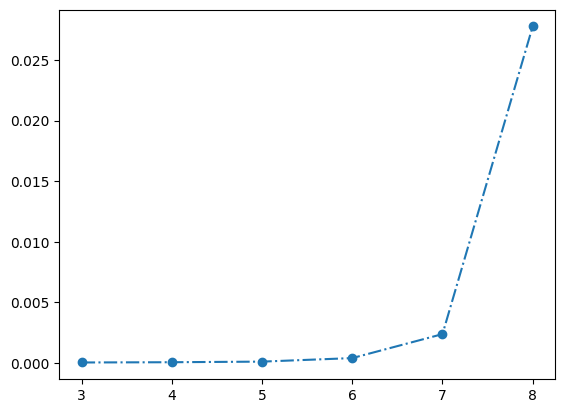

In [12]:
calculation_times = []
city_sizes = range(3, 9)

for i in city_sizes:
    print(i, "cities")
    calc_time = %timeit -o -n 100 solve_tsp_brute_force(create_cities(i), 0, verbose=False)
    calculation_times.append(calc_time.average)

plt.plot(list(city_sizes), calculation_times, 'o-.')